In [1]:
import os, sys, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

from rubin_sim.data import get_data_dir
import sqlite3

from sat_utils import Constellation, starlink_constellation_v1, starlink_constellation_v2

In [2]:
# load up some visits

limit = 900

dd = get_data_dir()
baseline_file = os.path.join(dd,'sim_baseline/baseline.db')

# Conenct to the sqlite database
con = sqlite3.connect(baseline_file)

# Load up the first year
df = pd.read_sql('select * from observations where night < 1 and sunAlt > -24;', con)

con.close()

In [3]:
# data frame with a list of observations
df

,observationId,fieldRA,fieldDec,observationStartMJD,flush_by_mjd,visitExposureTime,filter,rotSkyPos,rotSkyPos_desired,numExposures,...,sunAz,sunRA,sunDec,moonRA,moonDec,moonDistance,solarElong,moonPhase,cummTelAz,scripted_id
0,0,310.024480,-60.812928,60218.001806,60218.023576,30.0,y,-297.249225,-297.249225,2,...,255.593220,186.644048,-2.870827,27.609463,11.956111,94.490314,102.958651,87.407902,169.454444,0
1,1,310.601871,-63.561425,60218.002254,60218.023576,30.0,y,-297.708278,-297.708278,2,...,255.500445,186.644453,-2.871001,27.615338,11.959438,95.029204,101.743959,87.404494,170.502875,0
2,2,311.292611,-66.317774,60218.002703,60218.023576,30.0,y,-297.909620,-297.909620,2,...,255.407493,186.644858,-2.871176,27.621208,11.962765,95.563446,100.497860,87.401088,171.406738,0
3,3,312.140731,-69.082666,60218.003152,60218.023576,30.0,y,-297.838337,-297.838337,2,...,255.314364,186.645264,-2.871350,27.627073,11.966093,96.092842,99.221261,87.397685,172.197791,0
4,4,304.170163,-73.375442,60218.003623,60218.023576,30.0,y,-309.290623,-309.290623,2,...,255.216260,186.645690,-2.871533,27.633232,11.969593,99.605370,94.821142,87.394110,177.239803,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,830,336.319706,-85.448079,60218.392486,60218.404999,30.0,i,-56.043578,-56.043578,2,...,101.469398,186.997138,-3.022386,31.259086,14.500684,101.856712,90.893919,85.254586,146.948266,0
119,831,294.594225,-87.438033,60218.393053,60218.404999,30.0,i,-96.112005,-96.112005,2,...,101.360003,186.997650,-3.022606,31.264624,14.503548,104.786408,87.754422,85.251529,143.526699,0
120,832,324.991600,-82.868303,60218.393578,60218.404999,30.0,i,-68.489767,-68.489767,2,...,101.258784,186.998125,-3.022809,31.269767,14.506202,101.548293,92.280883,85.248692,149.115181,0
121,833,302.751653,-81.835351,60218.394084,60218.404999,30.0,i,-90.162716,-90.162716,2,...,101.161561,186.998582,-3.023006,31.274722,14.508754,104.149030,90.539605,85.245958,147.872290,0


In [4]:
# Make a satellite constellation
tles = starlink_constellation_v2()
constellation = Constellation(tles)

In [5]:
# Check the first method
lengths = []
nstreaks = []
n_rows = len(df)
t1 = time.time()
for index, row in df.iterrows():
    length, streak = constellation.check_pointing(row['altitude'], row['azimuth'],
                                    row['observationStartMJD'], row['visitTime'])
    lengths.append(length)
    nstreaks.append(streak)
    # A simple progress bar
    progress = index/float(n_rows)*100
    text = "\rprogress = %.3f%%" % progress
    sys.stdout.write(text) 
    sys.stdout.flush() 
t2 = time.time()
print('runtime = %.2f min' % ((t2-t1)/60.) )

progress = 99.187%runtime = 109.22 min


In [5]:
# check the new method
t1 = time.time()

fast_lengths, fast_nstreaks = constellation.check_pointings(df['fieldRA'].values, df['fieldDec'].values,
                                                           df['observationStartMJD'].values,
                                                           df['visitTime'].values)
t2 = time.time()
print('runtime = %.2f min' % ((t2-t1)/60.) )


runtime = 1.76 min


In [7]:
np.array(lengths)

array([5.60881736, 0.75254572, 1.84317523, 0.        , 0.        ,
       3.76330622, 5.76146688, 1.95945313, 2.71423987, 3.48625167,
       0.        , 1.67194322, 0.        , 0.        , 5.31168829,
       1.27700702, 5.01722929, 3.32201085, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       3.10784907, 3.42951415, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 3.45889291, 3.45602422, 2.44527104, 0.09447145,
       2.40679282, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 5.70571889, 0.        , 0.        ,
       0.        , 0.        , 2.66739714, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 3.47346659,
       4.23765946, 3.396428  , 3.1004066 , 0.        , 3.49865

In [6]:
fast_lengths

array([5.24494164, 0.        , 0.84980104, 0.        , 0.        ,
       4.0196608 , 5.68250975, 4.56798258, 2.43178029, 3.49401963,
       0.        , 1.48370243, 0.        , 0.71221995, 4.92694916,
       1.50148907, 5.25278645, 3.38452677, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       6.28575083, 3.45356923, 0.        , 0.        , 3.49320036,
       3.4831685 , 0.        , 3.11625458, 3.63124106, 2.03344696,
       3.48579985, 0.        , 1.20634559, 1.23421425, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 2.88524625, 3.42926493, 2.41624941, 0.10456003,
       2.39798786, 0.        , 0.        , 0.        , 0.        ,
       0.68815958, 0.        , 5.42598352, 4.68407058, 0.        ,
       6.03953697, 2.05477666, 2.73146229, 0.        , 0.        ,
       0.        , 0.        , 3.33445358, 0.        , 3.48322778,
       4.7005672 , 6.1432749 , 5.16306259, 1.84513616, 6.20478

In [9]:
(fast_lengths-np.array(lengths))/fast_lengths

/var/folders/05/z_zc9f654c5dlw06t4s_d68w0000gn/T/ipykernel_55912/2006847437.py:1: RuntimeWarning: divide by zero encountered in true_divide
  (fast_lengths-np.array(lengths))/fast_lengths
/var/folders/05/z_zc9f654c5dlw06t4s_d68w0000gn/T/ipykernel_55912/2006847437.py:1: RuntimeWarning: invalid value encountered in true_divide
  (fast_lengths-np.array(lengths))/fast_lengths


array([-0.0697722 ,        -inf, -1.17024707,         nan,         nan,
        0.06449719, -0.01430565,  0.57113405, -0.11580356,  0.0021912 ,
               nan, -0.12595113,         nan,  1.        , -0.07882363,
        0.15163496,  0.04489284,  0.01819211,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
        0.50559353,  0.00704577,         nan,         nan,  1.        ,
        1.        ,         nan,  1.        ,  1.        ,  1.        ,
        1.        ,         nan,  1.        ,  1.        ,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan, -0.19919763, -0.00790511, -0.01228879,  0.09726079,
       -0.00297195,         nan,         nan,         nan,         nan,
        1.        ,         nan, -0.05172893,  1.        ,         nan,
        1.        ,  1.        ,  0.02354661,         nan,         nan,
               nan,         nan,  1.        ,         nan,  0.00

In [10]:
fast_lengths, fast_nstreaks

(array([5.24300159, 0.        , 0.84929281, 0.        , 0.        ,
        4.02276314, 5.68020782, 4.56891743, 2.43254276, 3.49390752,
        0.        , 1.48491633, 0.        , 0.7153066 , 4.92359281,
        1.50525654, 5.25305378, 3.38356505, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        6.28602023, 3.45384917, 0.        , 0.        , 3.49320836,
        3.48334035, 0.        , 3.11699908, 3.63141714, 2.03523595,
        3.48592119, 0.        , 1.20013016, 1.2336049 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 2.88433934, 3.42891825, 2.4155864 , 0.10464977,
        2.39966115, 0.        , 0.        , 0.        , 0.        ,
        0.68911357, 0.        , 5.42508504, 4.68638917, 0.        ,
        6.03850679, 2.05479069, 2.73171988, 0.        , 0.        ,
        0.        , 0.        , 3.33467124, 0.        , 3.48301857,
        3.84761095, 6.1417463 , 5.16815578, 1.85

In [11]:
np.where(fast_nstreaks != nstreaks)

(array([  1,   2,   7,  13,  17,  25,  29,  30,  32,  33,  34,  35,  37,
         38,  46,  55,  58,  60,  61,  67,  71,  72,  73,  74,  75,  76,
         77,  79,  80,  81,  84,  85,  88,  89,  91,  92, 103, 115, 117,
        122]),)

In [12]:
# So, why is the fast method finding more streaks than the slow method?

In [13]:
i=60


In [14]:
fast_lengths, fast_nstreaks = constellation.check_pointings(df['fieldRA'].values[i], df['fieldDec'].values[i],
                                                           df['observationStartMJD'].values[i],
                                                           df['visitTime'].values[i])


In [15]:
length, streak = constellation.check_pointing(df['altitude'].values[i], df['azimuth'].values[i],
                                    df['observationStartMJD'].values[i], df['visitTime'].values[i])

In [16]:
streak, fast_nstreaks

(0, array([2]))

In [17]:
df['fieldRA'].values[i], df['fieldDec'].values[i]

(335.1643940702094, -67.800677738456)

In [18]:
df['altitude'].values[i], df['azimuth'].values[i]

(26.033737779289442, 204.7717879347459)

In [19]:
ras1, decs1, alts1, illums1 = constellation.paths_array(df['observationStartMJD'].values[i])

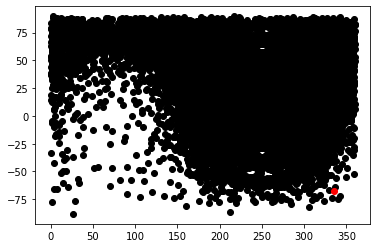

In [20]:
plt.plot(np.degrees(ras1), np.degrees(decs1), 'ko')
plt.plot(df['fieldRA'].values[i], df['fieldDec'].values[i], 'ro')

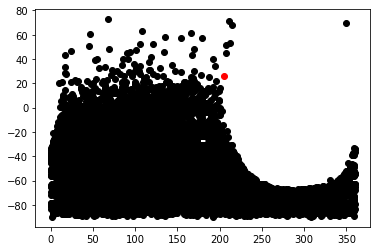

In [21]:
constellation.update_mjd(df['observationStartMJD'].values[i])
plt.plot(np.degrees(constellation.azimuth_rad), np.degrees(constellation.altitudes_rad),'ko')
plt.plot(df['azimuth'].values[i], df['altitude'].values[i],  'ro')

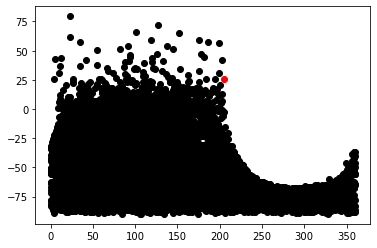

In [22]:
constellation.update_mjd(df['observationStartMJD'].values[i]+34/3600/24)
plt.plot(np.degrees(constellation.azimuth_rad), np.degrees(constellation.altitudes_rad),'ko')
plt.plot(df['azimuth'].values[i], df['altitude'].values[i],  'ro')